<a href="https://colab.research.google.com/github/priyasubha4/Python/blob/main/KNN_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 


In [2]:
#  Importing the dataset
dataset = pd.read_csv('/content/Social_Network_Ads.csv')

In [3]:
# Independent and Dependent Variables
X = dataset.iloc[:, [2,3]].values
y = dataset.iloc[:,4].values

In [4]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 0)

In [5]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [6]:
X_test

array([[-0.80480212,  0.50496393],
       [-0.01254409, -0.5677824 ],
       [-0.30964085,  0.1570462 ],
       [-0.80480212,  0.27301877],
       [-0.30964085, -0.5677824 ],
       [-1.10189888, -1.43757673],
       [-0.70576986, -1.58254245],
       [-0.21060859,  2.15757314],
       [-1.99318916, -0.04590581],
       [ 0.8787462 , -0.77073441],
       [-0.80480212, -0.59677555],
       [-1.00286662, -0.42281668],
       [-0.11157634, -0.42281668],
       [ 0.08648817,  0.21503249],
       [-1.79512465,  0.47597078],
       [-0.60673761,  1.37475825],
       [-0.11157634,  0.21503249],
       [-1.89415691,  0.44697764],
       [ 1.67100423,  1.75166912],
       [-0.30964085, -1.37959044],
       [-0.30964085, -0.65476184],
       [ 0.8787462 ,  2.15757314],
       [ 0.28455268, -0.53878926],
       [ 0.8787462 ,  1.02684052],
       [-1.49802789, -1.20563157],
       [ 1.07681071,  2.07059371],
       [-1.00286662,  0.50496393],
       [-0.90383437,  0.30201192],
       [-0.11157634,

In [7]:
# Fitting KNN Classification to the Training set 
from sklearn.neighbors import KNeighborsClassifier
Classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
Classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [8]:
# Predicting the Test set results
y_pred = Classifier.predict(X_test)

In [9]:
# MAking the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[64,  4],
       [ 3, 29]])

In [10]:
# To find the accuracy
from sklearn.metrics import accuracy_score
sr = accuracy_score(y_test, y_pred)
accuracy = sr*100
accuracy

93.0

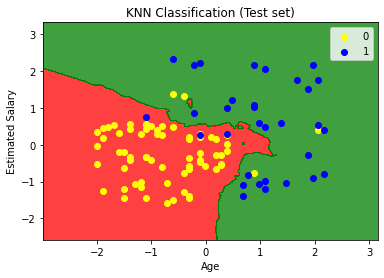

In [13]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min()-1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min()-1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, Classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate (np.unique(y_set)): 
  plt.scatter (X_set[y_set ==j, 0], X_set[y_set ==j, 1],
              c = ListedColormap(('yellow', 'Blue'))(i), label = j)
plt.title('KNN Classification (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()
            

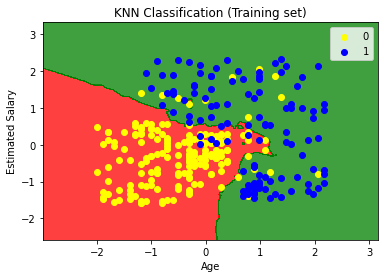

In [12]:
# Visualising the Training Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min()-1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min()-1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, Classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate (np.unique(y_set)): 
  plt.scatter (X_set[y_set ==j, 0], X_set[y_set ==j, 1],
              c = ListedColormap(('yellow', 'Blue'))(i), label = j)
plt.title('KNN Classification (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()